## Walking in the Latent Space

### 1. Import Libraries

In [1]:
import torch

import os
import numpy as np
from matplotlib import pyplot as plt

from config import *
from models import Generator

### 2. Make a Directory

In [2]:
interpolation_path = './results/interpolation/'

if not os.path.exists(interpolation_path):
    os.makedirs(interpolation_path)

### 3. Device Configuration

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### 4. Prepare Generator

In [4]:
path = os.path.join(config.weights_path, 'Face_Generator_Epoch_{}.pkl'.format(config.num_epochs))

In [5]:
G = Generator().to(device)
G.load_state_dict(torch.load(path))
G.eval()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

### 5. Walking in the Latent Space
#### 5.1 Noise

In [6]:
z_1 = torch.empty(1, config.noise_dim, 1, 1).uniform_(-1, 1).to(device)
z_2 = torch.empty(1, config.noise_dim, 1, 1).uniform_(-1, 1).to(device)

latent_space = np.linspace(0, 1, 10)

#### 5.2 Plot and Save

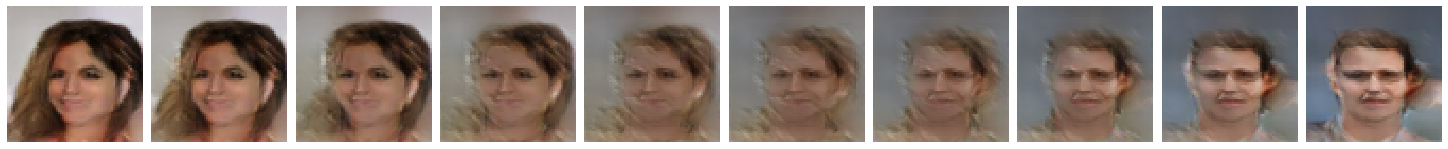

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(20, 2),  constrained_layout=True)

for ax, alpha in zip(axs.flat, latent_space):
    ax.axis('off')
    
    z = alpha * z_1 + (1-alpha) * z_2
    
    image = G(z)[0]
    image = image.detach().cpu().numpy().squeeze()
    image = image.transpose(1, 2, 0)
    image = (image+1)/2
    ax.imshow(image)
    
fig.savefig(os.path.join(interpolation_path, './Generated_Face_Interpolation.png'))